# Local Outlier Factor (LOF)
* A Semi-supervised ML algorithm that uses the density of data points in the distribution as a key factor to detect outliers
* LOF **compares the density of any given data point to the density of its neighbors**
    * Idea: **Since outliers come from low-density areas, the ratio will be higher for anomalous data points**
    * Rule of Thumb: A normal point has a LOF between 1 and 1.5. Anomalous points ~ much higher LOF
* Local Outlier Factor takes the density of data points into consideration to decide if a point is an anomaly or not
    * Measures the LOCAL DEVIATION OF THE DENSITY of a given sample with respect to its neighbors.
    * Computes an anomaly score that measures how isolated the point is with respect to the surrounding neighborhood
    * Takes into account the local as well as the global density to compute the anomaly score
* In mathematical terms: 
    * Formula for LOF:
        * **LOF(X)=[(LRD(1st neighbor) + LRD(2nd neighbor ) + .................+ LRD(kth neighbor))/LRD(X)]/k**
        * Where LRD: Local Reachability Distance
            * LRD(X) = 1/(sum of Reachability Distance (X, n))/k) where n is neighbors upto k

#### Components to the LOF Algorithm
* Hyperparameter *k* : determines the number of neighbors
* Reachability distance: distances measured using 3 methods - Euclid, Minkowski, Manhattan
* Local reachability distance: (LRD) (X) = 1/(Sum of Reachability Distance (X, n))/k), where n is neighbors up to k
* Local Outlier Factor (LOF)

### Reference: [DataTechNotes](https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html)

In [48]:
# data preparation
import pandas as pd
from numpy import quantile, where, random

# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns

# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
import os
import warnings  
warnings.filterwarnings('ignore')
import random

#### For demonstration purposes: create sample data with 5 data points

In [40]:
random.seed(1)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

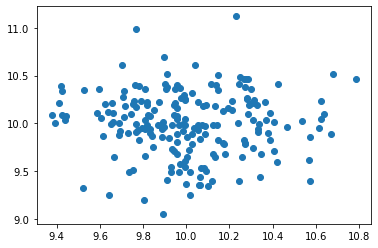

In [41]:
# plot data points
plt.scatter(x[:,0], x[:,1])
plt.show()

#### Try to see if our algorithm can detect the outliers

In [42]:
#Define the model with 20 neighbors and 3% contamination
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)

In [43]:
#Fit the model with x dataset and get the prediction data with the fit_predict() method
y_pred = lof.fit_predict(x)

In [49]:
#Extract the negative outputs as outliers
lofs_index = where(y_pred ==-1)
values = x[lofs_index]

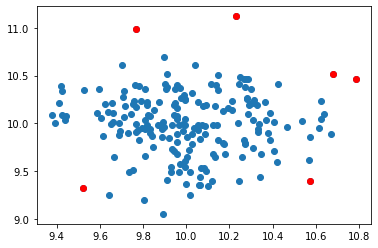

In [50]:
#Visualize the results, highlighting the anomalies
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

## Next step: Try it with another, multidimensional dataset (Ex: Seismic Bumps Dataset)
* Predicting Seismic Hazard (probability that an earthquake will occur)

* **Independent Variables**
    * **seismic**: a - lack of hazard, b - low hazard
    * **seismoacoustic**

In [5]:
#mat = scipy.io.loadmat('file.mat')

from scipy.io import arff

data = arff.loadarff('seismic-bumps.arff')
df = pd.DataFrame(data[0])

#Out of 19 attributes, 11 are utilized for outlier detection
#Positive (hazard) class is outlier class, negative class (no hazard) is an inlier class

In [7]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [14]:
df['class'].unique()

array([b'0', b'1'], dtype=object)

In [15]:
df[['class']].value_counts()

class
b'0'     2414
b'1'      170
dtype: int64

In [16]:
df['seismic'].unique()

array([b'a', b'b'], dtype=object)